Homework by Chenye Jin. Written in JupyterLab & $\LaTeX$.

均差情况N次牛顿插值法公式：$P_{n}(x_{0}+th)=f_{0}+t \triangle f_{0}+ \frac{t(t-1)}{2!}\triangle^2f_{0}+...+t \triangle f_{0}+ \frac{t(t-1)...(t-n+1)}{n!}\triangle^nf_{0}$

非均差情况N次牛顿插值公式：$P_n(x)=a_0+a_1(x-x_0)+...+a_n(x-x_0)...(x-x_n-1)$

写在这里给自己作为参考，公式摘自《数值分析（第五版）》（清华大学出版社，李庆扬、王能超、易大义编撰版）

# Implement Newton Interpolation

The Newton interpolation algorithm is a method to construct this polynomial function. 

It works by finding the coefficients of the polynomial one by one, starting from the constant term (the term without any variables) and working its way up to the higher-order terms.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolation(x, y, x_new):
    n = len(x)  # number of data points
    p = y.copy()  # copy y or python will use the reference of y which is not what we want
    for k in range(1, n):  # k is the degree of the polynomial
        for i in range(n-k):  # i is the index of the polynomial
            p[i] = (p[i+1] - p[i]) / (x[i+k] - x[i])  # divided difference
        for i in range(n-k):  # i is the index of the polynomial
            p[i+1] = p[i]  # shift the polynomial to the left
    
    def eval_poly(x_val):
        result = p[0]  # initialize result with the constant term
        for i in range(1, n):  # loop through the coefficients
            term = p[i]  # initialize the current term with the coefficient
            for j in range(i):  # loop to calculate the current term
                term *= (x_val - x[j])  # multiply by (x_val - x[j])
            result += term  # add the current term to the result
        return result  # return the computed polynomial value
    
    return [eval_poly(x_val) for x_val in x_new]  # evaluate the polynomial for each value in x_new

# Define $F1(x) = 2 \cdot sin(x^2) + \cos{\sqrt{x}}$

In [40]:
# 1: f(x) = 2*sin(x*x) + cos(sqrt(x))
f1 = lambda x: 2*np.sin(x**2) + np.cos(np.sqrt(x))

# Calculate Newton(x): $F1$

In [41]:
# a) ab = [0 1]
x1a = np.linspace(0, 1, 10)
y1a = f1(x1a)
x_new = np.arange(-0.5, 5.2, 0.2)
p1a = newton_interpolation(x1a, y1a, x_new)

# b) ab = [0.5 1.5]
x1b = np.linspace(0.5, 1.5, 10)
y1b = f1(x1b)
p1b = newton_interpolation(x1b, y1b, x_new)

# Define $F2(x) = e^{\sin{x}} + e^{x^2}$

In [42]:
# 2: f(x) = exp(sin(x)) + exp(x*x)
f2 = lambda x: np.exp(np.sin(x)) + np.exp(x**2)

# Calculate Newton(x): $F2$

In [43]:
# a) ab = [0 1.5]
x2a = np.linspace(0, 1.5, 10)
y2a = f2(x2a)
p2a = newton_interpolation(x2a, y2a, x_new)

# b) ab = [1.5 3]
x2b = np.linspace(1.5, 3, 10)
y2b = f2(x2b)
p2b = newton_interpolation(x2b, y2b, x_new)

# Print results to txt

In [44]:
np.savetxt('newton_p1a.txt', p1a)
np.savetxt('newton_p1b.txt', p1b)
np.savetxt('newton_p2a.txt', p2a)
np.savetxt('newton_p2b.txt', p2b)

# numpy is just a better way i think

# Plot final results and original functions

C:\Users\ezra\AppData\Local\Temp\ipykernel_48132\2783447856.py:2: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda x: 2*np.sin(x**2) + np.cos(np.sqrt(x))


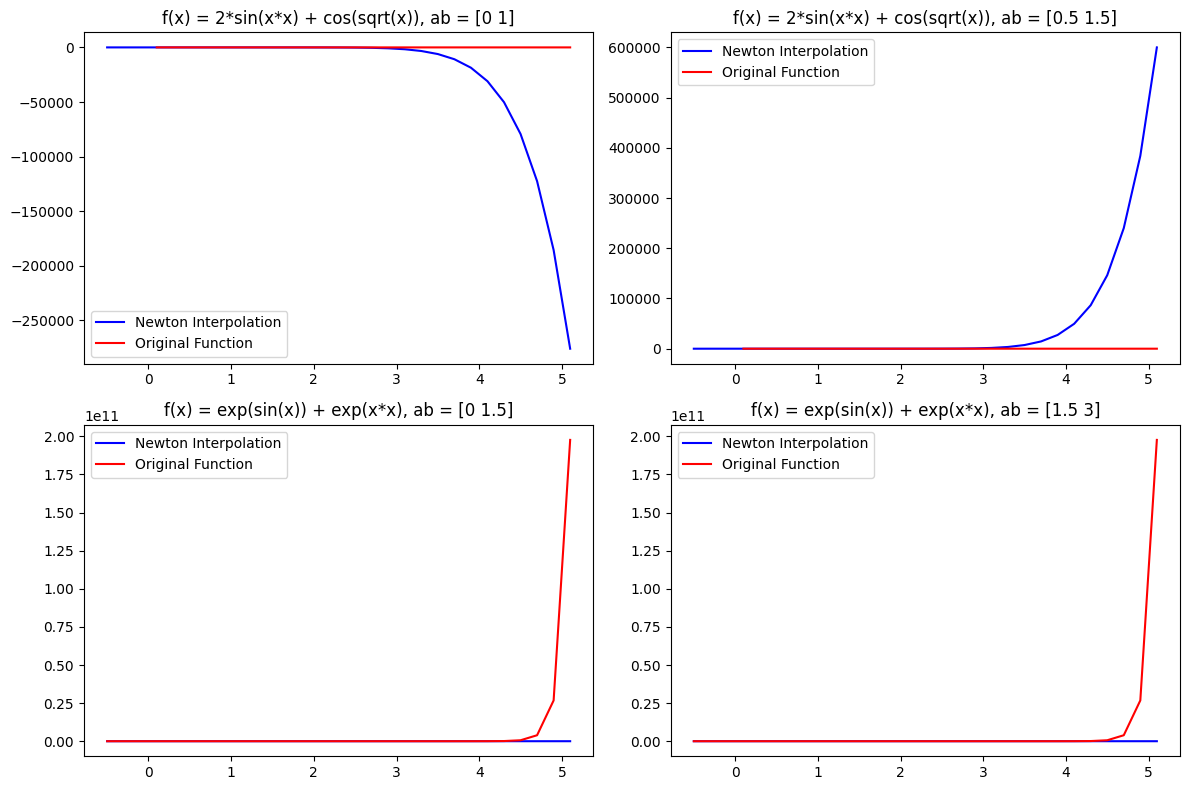

In [45]:
# plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot f1

axs[0, 0].plot(x_new, p1a, 'b', label='Newton Interpolation')
axs[0, 0].plot(x_new, f1(x_new), 'r', label='Original Function')
axs[0, 0].set_title('f(x) = 2*sin(x*x) + cos(sqrt(x)), ab = [0 1]')
axs[0, 0].legend()

axs[0, 1].plot(x_new, p1b, 'b', label='Newton Interpolation')
axs[0, 1].plot(x_new, f1(x_new), 'r', label='Original Function')
axs[0, 1].set_title('f(x) = 2*sin(x*x) + cos(sqrt(x)), ab = [0.5 1.5]')
axs[0, 1].legend()

# plot f2

axs[1, 0].plot(x_new, p2a, 'b', label='Newton Interpolation')
axs[1, 0].plot(x_new, f2(x_new), 'r', label='Original Function')
axs[1, 0].set_title('f(x) = exp(sin(x)) + exp(x*x), ab = [0 1.5]')
axs[1, 0].legend()

axs[1, 1].plot(x_new, p2b, 'b', label='Newton Interpolation')
axs[1, 1].plot(x_new, f2(x_new), 'r', label='Original Function')
axs[1, 1].set_title('f(x) = exp(sin(x)) + exp(x*x), ab = [1.5 3]')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# homework by chenyejin dont copy my code